In [5]:
from graph.ntu_rgb_d import Graph
import pandas as pd
graph = Graph()
print(graph.A[2,:6,:6])
# df = pd.DataFrame(graph.A)
# df

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [2]:
from model.ctrgcn import TCN_GCN_unit
import torch
x = torch.randn((4, 3, 64, 25))
model = TCN_GCN_unit(3, 64, graph.A, residual=False)
y = model(x)
print(y.shape)

torch.Size([4, 3, 64, 25])
torch.Size([4, 8, 25])
torch.Size([4, 3, 64, 25])
torch.Size([4, 8, 25])
torch.Size([4, 3, 64, 25])
torch.Size([4, 8, 25])
torch.Size([4, 64, 64, 25])


In [4]:
x1 = torch.arange(4).view(4, 1)
x2 = torch.arange(4).view(1, 4)
print(x1)
print(x2)
x1 - x2

tensor([[0],
        [1],
        [2],
        [3]])
tensor([[0, 1, 2, 3]])


tensor([[ 0, -1, -2, -3],
        [ 1,  0, -1, -2],
        [ 2,  1,  0, -1],
        [ 3,  2,  1,  0]])

In [1]:
from torch import nn
import torch
x = torch.randn((1, 256, 16, 25))
x2 = torch.randn((1, 64, 64, 25))
x3 = torch.randn((1, 128, 32, 25))

first_tram = nn.Sequential(
    nn.AvgPool2d((4,1)),
    nn.Conv2d(64, 256, 1),
    nn.BatchNorm2d(256),
    nn.ReLU()
)
second_tram = nn.Sequential(
    nn.AvgPool2d((2,1)),
    nn.Conv2d(128, 256, 1),
    nn.BatchNorm2d(256),
    nn.ReLU()
)

In [2]:
x2_ = first_tram(x2)
x3_ = second_tram(x3)
print(x2_.shape, x3_.shape)

torch.Size([1, 256, 16, 25]) torch.Size([1, 256, 16, 25])


In [6]:
import torch
from torch import nn
pre_spd_conv = nn.Sequential(
        nn.Conv2d(6, 6, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.Conv2d(6, 6, kernel_size=5),
        nn.ReLU(inplace=True),
)
x = torch.randn((6, 25, 25))
y = pre_spd_conv(x)
y.shape

torch.Size([6, 17, 17])

In [4]:
import torch
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.A = 1

    def forward(self, x):
        return x

model = Model()
model = torch.nn.DataParallel(model, device_ids=[0], output_device=0)

In [6]:
model.module.A

AttributeError: 'DataParallel' object has no attribute 'A'

AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'

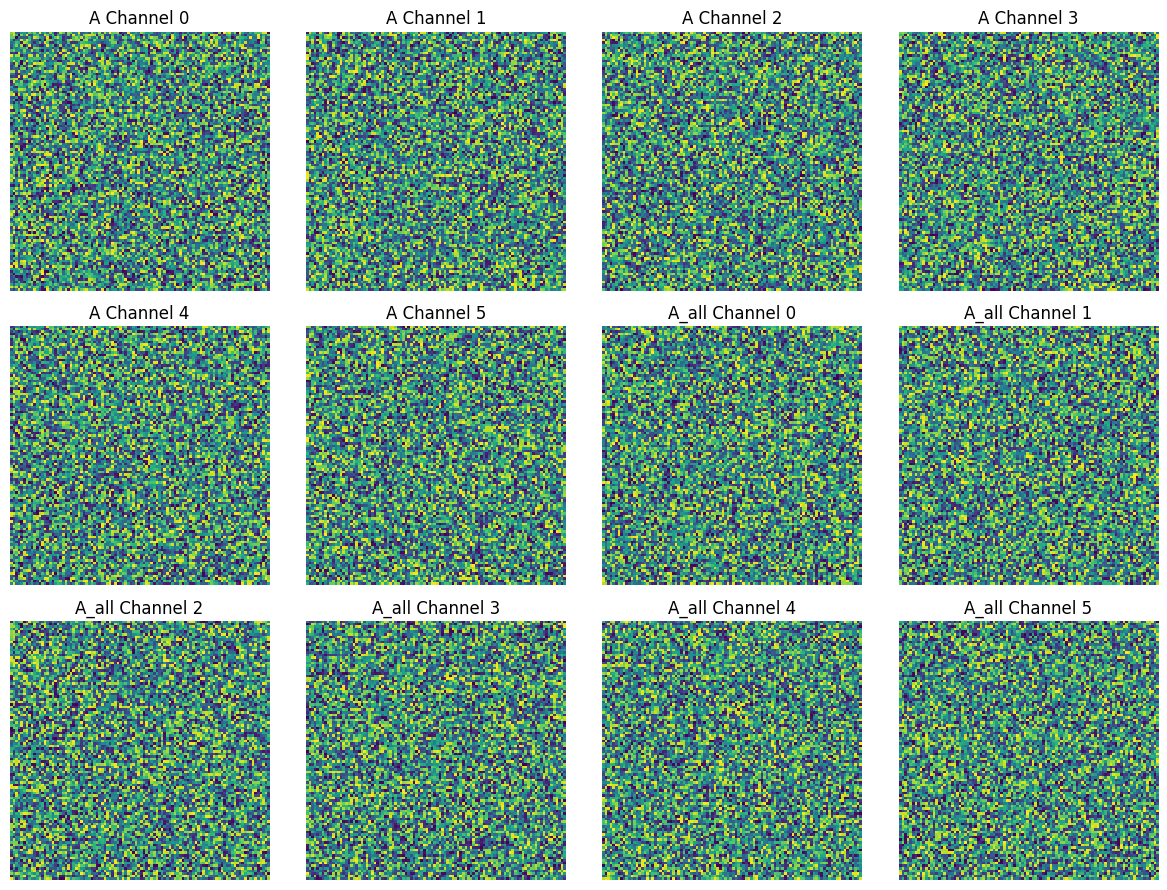

In [9]:
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
import numpy as np

# 创建一个12个子图的画布，每个子图都是一个矩阵
fig, axs = plt.subplots(3, 4, figsize=(12, 9))

# 假设A和A_all是你的图像数据，这里用随机数据代替
A = np.random.random((6, 100, 100))
A_all = np.random.random((6, 100, 100))

# 将A的每个通道画在前6个子图上
for i in range(6):
    row = i // 4
    col = i % 4
    axs[row, col].imshow(A[i], cmap='viridis', interpolation='nearest')
    axs[row, col].set_title(f'A Channel {i}')
    axs[row, col].axis('off')

# 将A_all的每个通道画在后6个子图上
for i in range(6):
    row = (i + 6) // 4
    col = (i + 6) % 4
    axs[row, col].imshow(A_all[i], cmap='viridis', interpolation='nearest')
    axs[row, col].set_title(f'A_all Channel {i}')
    axs[row, col].axis('off')

plt.tight_layout()

# 保存图像到本地
plt.savefig("my_figure.png")

# 将图像转换为NumPy数组并添加到TensorBoard
writer = SummaryWriter()
img = torchvision.io.read_image("my_figure.png")
img_numpy = np.array(img)
writer.add_image("MyFigure", img_numpy)  # 'HWC' means Height x Width x Channels
writer.close()


In [12]:
import torch
A = torch.arange((2 * 2 * 2 * 4 * 4)).view(2, 2, 2, 4, 4)
B = torch.arange((4 * 4)).view(1, 4, 4)

C = A + B

In [13]:
A

tensor([[[[[  0,   1,   2,   3],
           [  4,   5,   6,   7],
           [  8,   9,  10,  11],
           [ 12,  13,  14,  15]],

          [[ 16,  17,  18,  19],
           [ 20,  21,  22,  23],
           [ 24,  25,  26,  27],
           [ 28,  29,  30,  31]]],


         [[[ 32,  33,  34,  35],
           [ 36,  37,  38,  39],
           [ 40,  41,  42,  43],
           [ 44,  45,  46,  47]],

          [[ 48,  49,  50,  51],
           [ 52,  53,  54,  55],
           [ 56,  57,  58,  59],
           [ 60,  61,  62,  63]]]],



        [[[[ 64,  65,  66,  67],
           [ 68,  69,  70,  71],
           [ 72,  73,  74,  75],
           [ 76,  77,  78,  79]],

          [[ 80,  81,  82,  83],
           [ 84,  85,  86,  87],
           [ 88,  89,  90,  91],
           [ 92,  93,  94,  95]]],


         [[[ 96,  97,  98,  99],
           [100, 101, 102, 103],
           [104, 105, 106, 107],
           [108, 109, 110, 111]],

          [[112, 113, 114, 115],
           [116, 117,

In [14]:
B

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15]]])

In [15]:
C

tensor([[[[[  0,   2,   4,   6],
           [  8,  10,  12,  14],
           [ 16,  18,  20,  22],
           [ 24,  26,  28,  30]],

          [[ 16,  18,  20,  22],
           [ 24,  26,  28,  30],
           [ 32,  34,  36,  38],
           [ 40,  42,  44,  46]]],


         [[[ 32,  34,  36,  38],
           [ 40,  42,  44,  46],
           [ 48,  50,  52,  54],
           [ 56,  58,  60,  62]],

          [[ 48,  50,  52,  54],
           [ 56,  58,  60,  62],
           [ 64,  66,  68,  70],
           [ 72,  74,  76,  78]]]],



        [[[[ 64,  66,  68,  70],
           [ 72,  74,  76,  78],
           [ 80,  82,  84,  86],
           [ 88,  90,  92,  94]],

          [[ 80,  82,  84,  86],
           [ 88,  90,  92,  94],
           [ 96,  98, 100, 102],
           [104, 106, 108, 110]]],


         [[[ 96,  98, 100, 102],
           [104, 106, 108, 110],
           [112, 114, 116, 118],
           [120, 122, 124, 126]],

          [[112, 114, 116, 118],
           [120, 122,

In [2]:
import torch
from torch import nn
V = nn.Parameter(torch.randn((6, 3, 3, 3), dtype=torch.float32), requires_grad=True)
V

Parameter containing:
tensor([[[[ 0.9132,  0.5339,  0.7841],
          [ 0.6848, -0.8870, -1.1761],
          [ 1.4820,  0.5793, -0.8459]],

         [[ 0.6397, -1.3189, -2.1815],
          [ 0.1963,  1.0380, -1.8775],
          [-0.2753,  1.5062,  0.6772]],

         [[ 0.4948,  0.1339,  1.2637],
          [ 1.6123,  0.1457,  0.1786],
          [-0.2120, -1.9379, -0.7943]]],


        [[[ 1.0114, -1.0025,  0.8636],
          [ 0.4782, -0.9248,  0.1661],
          [-0.2643,  0.3946,  1.0026]],

         [[-0.9003,  0.7029, -1.0799],
          [-2.1963, -1.0423,  1.4440],
          [-1.8447, -0.4013,  0.7645]],

         [[ 0.4821,  0.5531, -1.3990],
          [ 0.2001,  1.5662, -0.9035],
          [ 0.3546,  0.6148, -1.0628]]],


        [[[-0.3535, -0.8032, -0.8132],
          [ 0.4290,  2.2102,  2.5788],
          [ 0.0394,  2.6048,  0.2216]],

         [[ 0.4708,  0.1927,  1.3581],
          [-1.8381,  0.8983,  1.1048],
          [-0.7425, -1.5883, -1.7319]],

         [[-0.7394,  1

In [6]:
V_T = torch.einsum('oiuv->oivu', V)
V_T.shape

torch.Size([6, 3, 3, 3])

In [11]:
W = torch.einsum('oiuv, oivw -> oiuw', V_T, V) + 1e-3 * torch.eye(3)

In [12]:
W

tensor([[[[ 3.5001,  0.7387, -1.3429],
          [ 0.7387,  1.4084,  0.9718],
          [-1.3429,  0.9718,  2.7145]],

         [[ 0.5245, -1.0545, -1.9505],
          [-1.0545,  5.0867,  1.9483],
          [-1.9505,  1.9483,  8.7438]],

         [[ 2.8901,  0.7119,  1.0816],
          [ 0.7119,  3.7957,  1.7345],
          [ 1.0816,  1.7345,  2.2607]]],


        [[[ 1.3225, -1.5605,  0.6879],
          [-1.5605,  2.0170, -0.6238],
          [ 0.6879, -0.6238,  1.7795]],

         [[ 9.0380,  2.3966, -3.6094],
          [ 2.3966,  1.7425, -2.5710],
          [-3.6094, -2.5710,  3.8369]],

         [[ 0.3992,  0.7981, -1.2321],
          [ 0.7981,  3.1379, -2.8421],
          [-1.2321, -2.8421,  3.9038]]],


        [[[ 0.3115,  1.3345,  1.4024],
          [ 1.3345, 12.3157,  6.9299],
          [ 1.4024,  6.9299,  7.3618]],

         [[ 4.1528, -0.3810, -0.1053],
          [-0.3810,  3.3679,  4.0050],
          [-0.1053,  4.0050,  6.0654]],

         [[ 2.1407, -0.7194,  1.2554],
     

In [43]:
import torch

def is_positive_definite(matrix):
    # Check if the matrix is symmetric
    if not torch.allclose(matrix, matrix.t()):
        return False

    # Check the eigenvalues of the matrix
    eigenvalues, _ = torch.eig(matrix)

    # A matrix is positive definite if all its eigenvalues are positive
    print(eigenvalues)

    return torch.all(eigenvalues[:, 0] >= 0)

# Example usage
# Replace this with your matrix
matrix = torch.tensor([[2, -1, 0], [-1, 2, -1], [0, -1, 2]], dtype=torch.float32)

if is_positive_definite(matrix):
    print("The matrix is positive definite.")
else:
    print("The matrix is not positive definite.")


tensor([[0.5858, 0.0000],
        [2.0000, 0.0000],
        [3.4142, 0.0000]])
The matrix is positive definite.


In [2]:
import torch

import torch

def generate_spd_matrix(size):
    A = torch.randn(size, size)
    spd_matrix = torch.mm(A, A.t()) + 1e-3 * torch.eye(size)
    return spd_matrix


def is_positive_definite(matrix):

    # Check the eigenvalues of the matrix
    eigenvalues, _ = torch.eig(matrix)

    # A matrix is positive definite if all its eigenvalues are positive
    print(eigenvalues[:, 0])

    return torch.all(eigenvalues[:, 0] >= 0)

# Example usage
size = 625  # Replace with the desired size of the matrix
spd_matrix = generate_spd_matrix(size)
# print(spd_matrix)


if is_positive_definite(spd_matrix):
    print("The matrix is positive definite.")
else:
    print("The matrix is not positive definite.")

tensor([2.5100e+03, 2.4365e+03, 2.3792e+03, 2.3597e+03, 2.3446e+03, 2.3053e+03,
        2.2933e+03, 2.2717e+03, 2.2657e+03, 2.2317e+03, 2.2204e+03, 2.2158e+03,
        2.1879e+03, 2.1953e+03, 2.1470e+03, 2.1569e+03, 2.1201e+03, 2.1112e+03,
        2.0971e+03, 2.0861e+03, 2.0648e+03, 2.0315e+03, 2.0398e+03, 2.0464e+03,
        2.0083e+03, 1.9995e+03, 1.9823e+03, 1.9803e+03, 1.9626e+03, 1.9481e+03,
        1.9339e+03, 1.9262e+03, 1.9113e+03, 1.8968e+03, 1.8907e+03, 1.8832e+03,
        1.8552e+03, 1.8515e+03, 1.8408e+03, 1.8322e+03, 1.8232e+03, 1.8158e+03,
        1.8128e+03, 1.7952e+03, 1.7895e+03, 1.7840e+03, 1.7323e+03, 1.7535e+03,
        1.7439e+03, 1.7672e+03, 1.7662e+03, 1.7268e+03, 1.7120e+03, 1.6930e+03,
        1.6977e+03, 1.6627e+03, 1.6660e+03, 1.6763e+03, 1.6797e+03, 1.5977e+03,
        1.6408e+03, 1.6351e+03, 1.6261e+03, 1.6178e+03, 1.6108e+03, 1.5863e+03,
        1.5784e+03, 1.5685e+03, 1.5711e+03, 1.5523e+03, 1.5460e+03, 1.5393e+03,
        1.5351e+03, 1.5228e+03, 1.5143e+

C:\Users\ishine\AppData\Local\Temp\ipykernel_14484\3349745867.py:14: UserWarning: torch.eig is deprecated in favor of torch.linalg.eig and will be removed in a future PyTorch release.
torch.linalg.eig returns complex tensors of dtype cfloat or cdouble rather than real tensors mimicking complex tensors.
L, _ = torch.eig(A)
should be replaced with
L_complex = torch.linalg.eigvals(A)
and
L, V = torch.eig(A, eigenvectors=True)
should be replaced with
L_complex, V_complex = torch.linalg.eig(A) (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\BatchLinearAlgebra.cpp:3427.)
  eigenvalues, _ = torch.eig(matrix)


In [21]:
import torch
from model.spd.nn import SPDCov2d
x = torch.randn((1, 625, 625))
spd_cov2d = SPDCov2d(1, 1, kernel_size=5, stride=2)
y = spd_cov2d(x)
y.shape

torch.Size([1, 311, 311])

In [22]:
spd_cov2d = SPDCov2d(1, 1, kernel_size=5, stride=2)
y = spd_cov2d(y)
y.shape

torch.Size([1, 154, 154])

In [23]:
spd_cov2d = SPDCov2d(1, 1, kernel_size=5, stride=2)
y = spd_cov2d(y)
y.shape

torch.Size([1, 75, 75])

In [24]:
spd_cov2d = SPDCov2d(1, 1, kernel_size=3, stride=3)
y = spd_cov2d(y)
y.shape

torch.Size([1, 25, 25])

In [22]:
import torch
from model.spd.nn import SPDCov2d
x = torch.randn((1, 400, 400))
spd_cov2d = SPDCov2d(1, 1, kernel_size=5, stride=3)
y = spd_cov2d(x)
y.shape

torch.Size([1, 132, 132])

In [23]:
spd_cov2d = SPDCov2d(1, 1, kernel_size=5, stride=3)
y = spd_cov2d(y)
y.shape

torch.Size([1, 43, 43])

In [24]:
spd_cov2d = SPDCov2d(1, 1, kernel_size=5, stride=2)
y = spd_cov2d(y)
y.shape

torch.Size([1, 20, 20])

In [18]:
spd_cov2d = SPDCov2d(1, 1, kernel_size=3, stride=2)
y = spd_cov2d(y)
y.shape

torch.Size([1, 23, 23])

In [3]:
x

tensor([[[ 1.8180,  0.1088,  1.4275,  ..., -0.4639,  0.3727, -1.6794],
         [-1.2901,  0.3085, -1.0390,  ...,  0.0872,  0.4382,  1.0885],
         [-1.4995, -0.7125,  0.0271,  ...,  0.8103, -1.4585,  0.1591],
         ...,
         [ 0.8467, -0.9722, -1.0782,  ...,  1.7707,  0.8947,  0.0950],
         [ 0.6251,  0.0051,  0.1090,  ...,  0.3674, -0.5685, -0.7792],
         [-0.0713, -0.2981,  1.2233,  ...,  0.5401,  1.0379, -0.1587]]])

In [8]:
import torch
from model.spd.nn import SPDCov2d, DiagonalizingLayer

x = generate_spd_matrix(150).unsqueeze(0).unsqueeze(0)
spdcovn2d1 = SPDCov2d(1, 1, kernel_size=5, stride=2) # (625 - 5) / 2 + 1
x = spdcovn2d1(x)
print(is_positive_definite(x[0][0]))
x.shape

tensor([8247.0469, 7922.6694, 7745.1221, 7617.8271, 7237.6538, 7114.4331,
        6935.3184, 6887.6904, 6746.7314, 6664.7808, 6487.4819, 6294.7031,
        6162.5322, 6099.9121, 5960.7168, 5722.8252, 1463.2306, 5541.8271,
        5467.5210, 5441.8320, 1606.9811, 1684.1101, 5239.8818, 5169.9590,
        5087.2876, 1797.0920, 4957.5591, 4941.0908, 1845.3771, 1875.5493,
        1959.8951, 2022.5767, 2065.7805, 2131.2727, 4725.7227, 2215.7202,
        2257.1682, 2332.2412, 2352.4094, 2423.5901, 4648.2959, 4595.9141,
        4569.8579, 2552.5481, 2600.3340, 2664.9976, 2696.3411, 2790.1223,
        2866.3796, 2895.5938, 4457.2310, 4361.2437, 4329.8354, 3020.1851,
        4222.9214, 4169.1528, 4110.8740, 4053.5964, 4019.5264, 3906.1882,
        3844.5552, 3090.3555, 3098.3850, 3132.1116, 3215.3337, 3256.3018,
        3739.8142, 3338.3574, 3469.6699, 3397.4084, 3566.2720, 3607.1104,
        3634.5522], grad_fn=<SelectBackward0>)
tensor(True)


torch.Size([1, 1, 73, 73])

In [11]:
spdcovn2d2 = SPDCov2d(6, 12, kernel_size=5, stride=2)
x = spdcovn2d2(x)

print(x)
print(is_positive_definite(x[0][0]))
x.shape

tensor([[[[ 2.8860e+06,  1.6073e+05,  1.1021e+05,  ...,  2.0641e+04,
            3.2954e+04,  8.7172e+03],
          [ 1.6073e+05,  2.8593e+06,  1.4323e+05,  ..., -2.5122e+04,
            5.0138e+04,  4.6411e+04],
          [ 1.1021e+05,  1.4323e+05,  2.9266e+06,  ...,  1.7128e+04,
           -8.3368e+03, -7.4307e+03],
          ...,
          [ 2.0641e+04, -2.5122e+04,  1.7128e+04,  ...,  2.8879e+06,
            2.2118e+05,  9.6558e+04],
          [ 3.2954e+04,  5.0138e+04, -8.3368e+03,  ...,  2.2118e+05,
            2.8665e+06,  1.5760e+05],
          [ 8.7172e+03,  4.6411e+04, -7.4307e+03,  ...,  9.6558e+04,
            1.5760e+05,  2.8624e+06]],

         [[ 3.3409e+06, -2.2049e+05, -8.5787e+04,  ...,  1.3527e+04,
            4.0757e+04, -3.1259e+03],
          [-2.2049e+05,  3.3913e+06, -2.2761e+05,  ..., -3.1923e+04,
            1.7062e+04,  5.2302e+04],
          [-8.5787e+04, -2.2761e+05,  3.4056e+06,  ...,  1.0148e+03,
            1.6468e+04, -8.4975e+03],
          ...,
     

torch.Size([1, 12, 154, 154])

In [12]:
spdcovn2d3 = SPDCov2d(12, 12, kernel_size=5, stride=2)
x = spdcovn2d3(x)
print(is_positive_definite(x[0][0]))
x.shape

tensor([9.7906e+08, 9.5755e+08, 9.4371e+08, 9.2292e+08, 6.3166e+08, 9.0627e+08,
        6.4712e+08, 8.9091e+08, 8.8558e+08, 6.5420e+08, 6.5559e+08, 6.6138e+08,
        8.7636e+08, 8.7117e+08, 8.6345e+08, 8.6390e+08, 6.7115e+08, 8.5335e+08,
        6.7378e+08, 6.7579e+08, 6.7751e+08, 6.8081e+08, 8.5044e+08, 8.4837e+08,
        8.4559e+08, 6.8667e+08, 6.9007e+08, 6.9222e+08, 8.4017e+08, 8.3948e+08,
        8.3336e+08, 6.9842e+08, 7.0337e+08, 7.0464e+08, 7.0669e+08, 7.0981e+08,
        7.1247e+08, 8.2759e+08, 8.2609e+08, 8.2366e+08, 8.1926e+08, 8.1510e+08,
        8.1260e+08, 8.0900e+08, 7.1658e+08, 7.2043e+08, 7.2166e+08, 7.2295e+08,
        8.0592e+08, 8.0341e+08, 8.0051e+08, 7.9905e+08, 7.9466e+08, 7.2812e+08,
        7.8956e+08, 7.8772e+08, 7.8667e+08, 7.8338e+08, 7.8006e+08, 7.7961e+08,
        7.7396e+08, 7.7245e+08, 7.6959e+08, 7.6429e+08, 7.3185e+08, 7.3158e+08,
        7.6032e+08, 7.3902e+08, 7.5602e+08, 7.4250e+08, 7.4309e+08, 7.4536e+08,
        7.4914e+08, 7.5205e+08, 7.5094e+

torch.Size([1, 12, 75, 75])

In [32]:
spdcovn2d4 = SPDCov2d(6, 6, kernel_size=5, stride=3)
x = spdcovn2d4(x)
x.shape

torch.Size([1, 6, 16, 16])

In [33]:
spdcovn2d5 = SPDCov2d(6, 6, kernel_size=3, stride=3)
x = spdcovn2d5(x)
print(is_positive_definite(x[0][0]))
x.shape

torch.Size([1, 6, 5, 5])

In [5]:
import torch
x = torch.randn((4, 625))
spd = torch.cov(x.T)
spd.shape

torch.Size([625, 625])

In [4]:
import torch
x = torch.randn(6, 4, 25, 25)
x.mean(1).shape

torch.Size([6, 25, 25])

In [6]:
import torch

# 示例数据
X = torch.randn(3, 6, 16)  # 假设 B=3, V=4

# 计算协方差矩阵
cov_matrices = torch.cov(X, rowvar=False)

# 显示结果
print('协方差矩阵的形状:', cov_matrices.shape)  # 输出 torch.Size([3, 6, 6])


TypeError: cov() got an unexpected keyword argument 'rowvar'

In [9]:
import torch
x = torch.randn(32, 25, 25).unsqueeze(1)
x.shape

torch.Size([32, 1, 25, 25])

In [3]:
import torch
b = 1
t = 4
c = 40

x1 = torch.randn((b, t, c))
x2 = torch.randn((b, c, t))
At = torch.matmul(x1, x2)

In [4]:
At.shape

torch.Size([1, 4, 4])

In [5]:
At

tensor([[[ 7.8857,  0.5968,  0.5115, -9.3234],
         [ 0.0964, -0.9838,  2.4713,  5.3194],
         [-6.1680,  6.8068,  2.8941, -0.0794],
         [-4.4598,  5.8453,  3.5989,  0.1669]]])

In [7]:
torch.nn.functional.softmax(At, dim=2)

tensor([[[9.9869e-01, 6.8217e-04, 6.2636e-04, 3.3542e-08],
         [5.0613e-03, 1.7184e-03, 5.4409e-02, 9.3881e-01],
         [2.2705e-06, 9.7942e-01, 1.9576e-02, 1.0008e-03],
         [3.0167e-05, 9.0153e-01, 9.5362e-02, 3.0823e-03]]])

In [29]:
import torch

x = torch.randn((3, 2, 6, 32))
K = 3
S = 2
D = 2
P = ((K - 1) * D) // S
print(P)
conv = torch.nn.Conv2d(2, 2, kernel_size=(K, 1), stride=(S, 1), padding=(P, 0), dilation=(D, 1))
conv(x).shape

2


torch.Size([3, 2, 3, 32])

In [1]:
import torch
import torch as th
import torch.nn as nn
# from torch.autograd import Function as F
import geoopt
from geoopt import SymmetricPositiveDefinite
from torch.nn import functional as F
import geoopt.manifolds.symmetric_positive_definite
# import SymmetricPositiveDefinite
from geoopt.manifolds import Stiefel

kernel_size = 3


W = geoopt.ManifoldParameter(th.eye(kernel_size, kernel_size, dtype=torch.float32),
                                          manifold=SymmetricPositiveDefinite())

OSError: [WinError 1455] 页面文件太小，无法完成操作。 Error loading "D:\Anaconda3\envs\T2V\lib\site-packages\torch\lib\cudnn_cnn_infer64_8.dll" or one of its dependencies.

In [2]:
import cv2

# 读取RGB图像
rgb_image = cv2.imread('SPD.png')

# 将RGB图像转换为灰度图像
gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

# 显示原始RGB图像和转换后的灰度图像（可选）
cv2.imshow('RGB Image', rgb_image)
cv2.imshow('Gray Image', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 保存灰度图像
cv2.imwrite('SPD_gray.png', gray_image)


True

In [5]:
import torch

A = torch.randn(25, 25)
U, S, Vh = torch.linalg.svd(A, full_matrices=False)

U, S, Vh


(tensor([[-0.3850,  0.1065, -0.0052, -0.0180, -0.0556, -0.2339, -0.3980, -0.4033,
           0.3335,  0.1739, -0.1527,  0.0524,  0.1763,  0.2533, -0.1643, -0.1009,
           0.1981,  0.0547, -0.1384,  0.1950,  0.0343, -0.0049,  0.0108, -0.2200,
           0.1101],
         [-0.0429,  0.3017,  0.0196, -0.2402,  0.4648, -0.0775, -0.1696,  0.1426,
           0.2429,  0.0905,  0.0145,  0.1096,  0.0861, -0.1163,  0.0971,  0.0050,
          -0.4162,  0.0933, -0.1741, -0.0032, -0.2886,  0.2964, -0.1726,  0.2142,
          -0.0948],
         [-0.0863, -0.0740,  0.1119,  0.0867, -0.0793, -0.0054, -0.3453,  0.0189,
          -0.0708,  0.0163, -0.3601, -0.1960, -0.2704, -0.2751, -0.1123, -0.2511,
          -0.0878, -0.1806,  0.3054, -0.1228, -0.1974, -0.0530, -0.2841, -0.1634,
          -0.3813],
         [ 0.2511, -0.1453,  0.2992, -0.0844,  0.1501, -0.0870,  0.2352, -0.3940,
          -0.0940,  0.0979, -0.0047, -0.2155, -0.2902,  0.3525, -0.1097, -0.0816,
          -0.0355, -0.2820, -0.0364,  

In [6]:
U, S, Vh = torch.svd(A)

U, S, Vh


(tensor([[-0.3850,  0.1065, -0.0052, -0.0180, -0.0556, -0.2339, -0.3980, -0.4033,
           0.3335,  0.1739, -0.1527,  0.0524,  0.1763,  0.2533, -0.1643, -0.1009,
           0.1981,  0.0547, -0.1384,  0.1950,  0.0343, -0.0049,  0.0108, -0.2200,
           0.1101],
         [-0.0429,  0.3017,  0.0196, -0.2402,  0.4648, -0.0775, -0.1696,  0.1426,
           0.2429,  0.0905,  0.0145,  0.1096,  0.0861, -0.1163,  0.0971,  0.0050,
          -0.4162,  0.0933, -0.1741, -0.0032, -0.2886,  0.2964, -0.1726,  0.2142,
          -0.0948],
         [-0.0863, -0.0740,  0.1119,  0.0867, -0.0793, -0.0054, -0.3453,  0.0189,
          -0.0708,  0.0163, -0.3601, -0.1960, -0.2704, -0.2751, -0.1123, -0.2511,
          -0.0878, -0.1806,  0.3054, -0.1228, -0.1974, -0.0530, -0.2841, -0.1634,
          -0.3813],
         [ 0.2511, -0.1453,  0.2992, -0.0844,  0.1501, -0.0870,  0.2352, -0.3940,
          -0.0940,  0.0979, -0.0047, -0.2155, -0.2902,  0.3525, -0.1097, -0.0816,
          -0.0355, -0.2820, -0.0364,  